# **Harshit Jaiswal**   
**I have used four models in this project.**

*  1. DecisionTreeClassifier
*  2. RandomForestClassifier
*  3. KNeighborsClassifier
*  4. LogisticRegression
*  5. Bayes Classifier      
   *  5.a. BernoulliNB
   *  5.b. MultinomialNB

# **Importing the libraries**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier # Accuracy 100%
from sklearn.ensemble import RandomForestClassifier # Accuracy 100%
from sklearn.neighbors import KNeighborsClassifier # Accuracy 100%
from sklearn.linear_model import LogisticRegression # Accuracy 100%
from sklearn.naive_bayes import MultinomialNB # Accuracy 100%
from sklearn.naive_bayes import BernoulliNB # Accuracy 100%
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Dimensions of the Dataset
data.shape

(1025, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **1. Decision Tree Classifier**

In [ ]:
# Slicing data
# declare feature vector and target variable
x1 = data.drop(['fbs'], axis=1)
y1 = data['restecg']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state= 40)

In [ ]:
# Instantiate the DecisionTreeClassifier model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42)
dtc.fit(x1_train,y1_train)
#Predict the response for test dataset
y1_pred = dtc.predict(x1_test)
# Predict the response for training dataset
y1_train_predict = dtc.predict(x1_train)
y1_test_predict = dtc.predict(x1_test)
dtc

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

# Train accuracy
y_train_predict = dtc.predict(x1_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y1_train,y1_train_predict)*100))

# Test accuracy
y_test_predict = dtc.predict(x1_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y1_test,y1_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [ ]:
print('Precision, Recall and f1-score : \n',classification_report(y1_test,y1_pred))
print('Confusion Matrix : \n',confusion_matrix(y1_test,y1_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00         5

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix : 
 [[107   0   0]
 [  0  93   0]
 [  0   0   5]]


# **Pruning of our decision tree**

In [ ]:
path = dtc.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# **Visualizing alpha w.r.t impurity of leaves**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

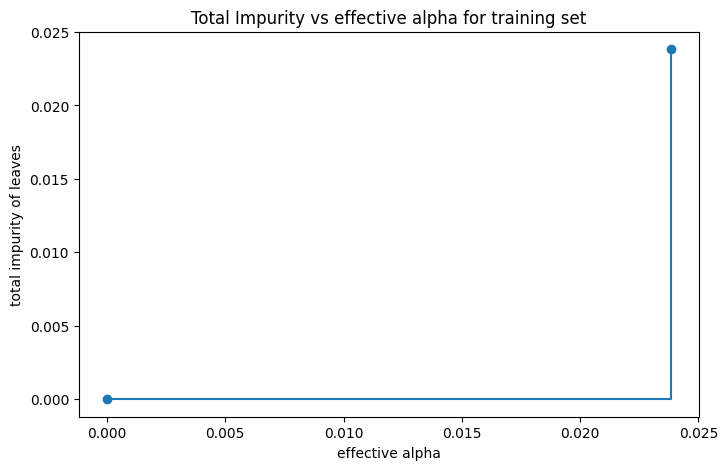

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42, ccp_alpha=ccp_alpha)
  clf.fit(x1_train, y1_train)
  clfs.append(clf)
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 5 with ccp_alpha: 0.48747976702682516
Number of nodes in the last tree is: 3 with ccp_alpha: 0.48747976702682516
Number of nodes in the last tree is: 1 with ccp_alpha: 0.48747976702682516


In [ ]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42,ccp_alpha=0.016)
clf.fit(x1_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.016, max_depth=7, random_state=42)

In [ ]:
pred=clf.predict(x1_test)
print('Accuracy of test dataset : ',accuracy_score(y1_test, pred))
pred_1 = clf.predict(x1_train)
print('Accuracy of train dataset : ',accuracy_score(y1_train,pred_1))

Accuracy of test dataset :  1.0
Accuracy of train dataset :  1.0


# **2. Random Forest Classifier**

In [ ]:
# Slicing data
X = data.drop(['fbs'], axis=1)
y = data['restecg']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(820, 13)
Shape train labels :(820,)
Shape test features :(205, 13)
Shape test labels :(205,)


In [ ]:
# Instantiate the RandomForestClassifier model
rfc = RandomForestClassifier(criterion='gini',random_state=45,n_estimators=50,max_depth=7)
rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [ ]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = rfc.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = rfc.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [ ]:
print('Precision, Recall and f1-score : \n',classification_report(y_test,y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00         5

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix : 
 [[107   0   0]
 [  0  93   0]
 [  0   0   5]]


In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

restecg     0.757375
thalach     0.057005
chol        0.045832
age         0.037214
trestbps    0.029655
oldpeak     0.025056
slope       0.010742
cp          0.008908
ca          0.007946
thal        0.006122
target      0.006009
exang       0.004980
sex         0.003155
dtype: float64

# **3. KNN**

In [ ]:
# Slicing data
X2 = data.drop(['fbs'], axis=1)
y2 = data['restecg']

In [ ]:
# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier with the specified parameters
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski', n_jobs=-1, n_neighbors=1, p=2, weights='uniform')

# Fit the classifier to the training data
knn.fit(X2_train, y2_train)

In [ ]:
pred2 = knn.predict(X2_test)
print(pred2)

[1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 1 1 1 2 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 2 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 1 1 0 0 0 1 1 2 0 1 1 1 1 0 0]


In [ ]:
print('Confusion Matrix \n', confusion_matrix(y2_test,pred2))
print('Classification Report \n',classification_report(y2_test,pred2))
print('Accuracy : ',accuracy_score(y2_test, pred2)*100,'%')

Confusion Matrix 
 [[ 91   0   0]
 [  0 111   0]
 [  0   0   3]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00         3

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy :  100.0 %


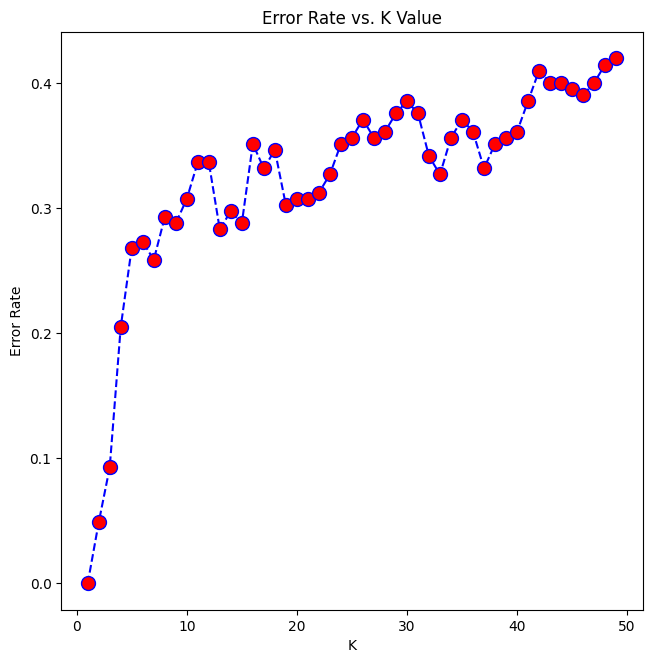

In [ ]:
# Will take some time
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    error_rate.append(np.mean(pred_i != y2_test))

# Plot the error rate vs. K value
plt.figure(figsize=(7.5,7.5))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y2_test,pred2))
print('\n')
print(classification_report(y2_test,pred2))
print('Accuracy : ',accuracy_score(y2_test, pred2)*100,'%')

WITH K=1


[[ 91   0   0]
 [  0 111   0]
 [  0   0   3]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00         3

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy :  100.0 %


# **4. Logistic Regression**

In [ ]:
# Slicing data
X3 = data.drop(['slope','sex'], axis=1)
y3 = data['exang']

In [ ]:
# Create a new target variable with 3 categories
y3_cat = pd.cut(y3, 3, labels=["Low", "Medium", "High"])

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3_cat, test_size=0.2, random_state=42)

# Create a LogisticRegression model
logr = LogisticRegression()

# Fit the model to the training data
logr.fit(X3_train, y3_train)

LogisticRegression()

In [ ]:
# Prediction result
y3_pred_test = logr.predict(X3_test)

In [ ]:
print('Confusion Matrix \n', confusion_matrix(y3_test, y3_pred_test))
print('Classification Report \n',classification_report(y3_test, y3_pred_test))
print('Accuracy : ',accuracy_score(y3_test, y3_pred_test)*100,'%')

Confusion Matrix 
 [[ 62   0]
 [  0 143]]
Classification Report 
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        62
         Low       1.00      1.00      1.00       143

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy :  100.0 %


# **5. Bayes Classifier**    
**5.a. Using BernoulliNB**

In [ ]:
# Slicing data
X4 = data.drop(['slope','sex'], axis=1)
y4 = data['exang']

In [ ]:
# Splitting the dataset into the Training set and Test set
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 42)

In [ ]:
# Training the Naive Bayes model on the Training set
bnb = BernoulliNB()
bnb.fit(X4_train, y4_train)

BernoulliNB()

In [ ]:
# Predicting the Test set results using Bernoulli
y4_pred = bnb.predict(X4_test)
print("Predicted Test Results using Bernoulli: \n",y4_pred)

Predicted Test Results using Bernoulli: 
 [0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


In [ ]:
print('Confusion Matrix \n', confusion_matrix(y4_test, y4_pred))
print('Classification Report \n',classification_report(y4_test, y4_pred))
print('Accuracy : ',accuracy_score(y4_test, y4_pred)*100,'%')

Confusion Matrix 
 [[143   0]
 [  0  62]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        62

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy :  100.0 %


**5.b. Using MultinomialNB**

In [ ]:
# Slicing data
X5 = data.drop(['slope','sex'], axis=1)
y5 = data['exang']

In [ ]:
# Splitting the dataset into the Training set and Test set
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 42)

In [ ]:
# Training the Naive Bayes model on the Training set
mnb = MultinomialNB()
mnb.fit(X4_train, y4_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results using Multinomial
y5_pred = bnb.predict(X5_test)
print("Predicted Test Results using Multinomial: \n",y5_pred)

Predicted Test Results using Multinomial: 
 [0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


In [ ]:
print('Confusion Matrix \n', confusion_matrix(y5_test, y5_pred))
print('Classification Report \n',classification_report(y5_test, y5_pred))
print('Accuracy : ',accuracy_score(y5_test, y5_pred)*100,'%')

Confusion Matrix 
 [[143   0]
 [  0  62]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        62

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy :  100.0 %


*  **1. DecisionTreeClassifier :** Accuracy = 100%
*  **2. RandomForestClassifier :** Accuracy = 100%
*  **3. KNeighborsClassifier :** Accuracy = 100%
*  **4. LogisticRegression :** Accuracy = 100%
*  **5. Bayes Classifier :**     
      5.a. Using BernoulliNB: Accuracy = 100%      
      5.b. Using MultinomialNB: Accuracy = 100%







